⏳ 03_survival_modeling.ipynb

In [12]:
#1 Install lifelines if not already installed
!pip install lifelines

In [13]:
#2 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#3 Load preprocessed data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/projects/fsgs/notebooks/fsgs_dataset_preprocessed.csv')

In [15]:
#4 Define survival time and event
T = df['FU_ESRD']  # Assuming 'FU_ESRD' is the survival time column
E = df['outcome_dialysis_y_n']  # Assuming 'outcome_dialysis_y_n' is the event occurred column

In [16]:
#5 Cox Proportional Hazards Model
from lifelines import CoxPHFitter
cph = CoxPHFitter()

# Select a subset of relevant features to avoid collinearity and 'more variables than samples' issue.
# The full DataFrame has 2130 columns and only 579 rows, leading to numerical instability.
# Let's start with 'bmi_kgm2' as a covariate, ensuring duration (T.name) and event (E.name) are included.
selected_features = ['bmi_kgm2', T.name, E.name] # Add other relevant features here as needed

# Filter out any non-existent columns from selected_features if they were manually added
selected_features_existing = [col for col in selected_features if col in df.columns]

df_selected_features = df[selected_features_existing].copy()

cph.fit(df_selected_features, duration_col=T.name, event_col=E.name)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 579 total observations, 0 right-censored observations>
             duration col = 'FU_ESRD'
                event col = 'outcome_dialysis_y_n'
      baseline estimation = breslow
   number of observations = 579
number of events observed = 579
   partial log-likelihood = -3108.12
         time fit was run = 2025-12-15 00:15:48 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
bmi_kgm2  -0.02      0.98      0.04           -0.10            0.06                0.90                1.06

           cmp to     z    p  -log2(p)
covariate                             
bmi_kgm2     0.00 -0.59 0.56      0.85
---
Concordance = 0.51
Partial AIC = 6218.23
log-likelihood ratio test = 0.36 on 1 df
-log2(p) of ll-ratio test = 0.86

In [17]:
#6 Kaplan-Meier Curve
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 579 total observations, 491 right-censored observations>

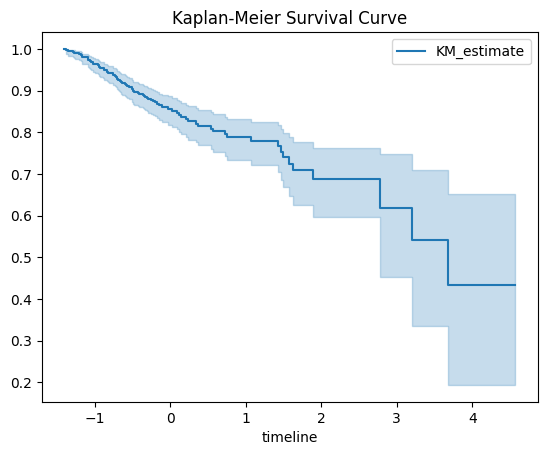

In [19]:
import matplotlib.pyplot as plt
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.show()